In [8]:
import numpy as np
import os

id_dict = np.load("/home/MinaHossain/DMNet_Rina/training_codes/data_trainlist/ids_allGT copy.npy", allow_pickle=True).item()
training = id_dict['train']
validation = id_dict['val']
#validation

In [9]:
os.chdir(r'/home/MinaHossain/DMNet_Rina/training_codes/Data/train/')
folder_name = 'Cell-Data-P2'
#folder_type = 'ST'
folder_num = ['01','02']

results = []

for tf in folder_num:
    im=os.path.join(folder_name, tf)
    if tf == '01':
        folder_type = 'ST'
    else:
        folder_type = 'GT'
    
    A = []
    #n_images = 748
    dir_path = im
    #dir_path = r'/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell_Data'
    #for i in range(n_images):
    count=0
    for i in os.listdir(dir_path):
        if os.path.isfile(os.path.join(dir_path, i)):
            # count += 1
            A.append(f'{folder_name}_{folder_type}_{tf}_{count:04d}')
            count += 1
        # count +=1
    results.append(A)

#print(A)
#results[1]
# print(type(results[0]))
# print(type(id_dict['train']))

training = np.concatenate((id_dict['train'] , np.array(results[0])),axis=0)
#training = np.vstack((id_dict['train'] , np.array(results[0])))
#validation = id_dict['val'] + np.array(results[1])
#print(training)
validation = np.concatenate((id_dict['val'] , np.array(results[1])),axis=0)




In [10]:
training

array(['BF-C2DL-HSC_GT_01_0108', 'BF-C2DL-HSC_GT_01_0126',
       'BF-C2DL-HSC_GT_01_0175', ..., 'Cell-Data-P2_ST_01_1548',
       'Cell-Data-P2_ST_01_1549', 'Cell-Data-P2_ST_01_1550'], dtype='<U29')

In [46]:
# obj = np.load("training_codes/data_trainlist/ids_allGT+ST.npy", allow_pickle=True).item()
# for i in obj['train']:
#     print(i)
# print("\n\n")
# for i in obj['val']:
#     print(i)

In [47]:
# obj = np.load("training_codes/data_trainlist/ids_allST.npy", allow_pickle=True).item()
# for i in obj['train']:
#     print(i)
# print("\n\n")
# for i in obj['val']:
#     print(i)

In [48]:
# test = {'train': training, 'val': validation}
# np.save('test.npy', test)

In [11]:
# test = np.load('test_save.npy', allow_pickle=True)
# #test.item()
validation

array(['BF-C2DL-HSC_GT_01_0175', 'BF-C2DL-HSC_GT_01_0218',
       'BF-C2DL-HSC_GT_01_0347', 'BF-C2DL-HSC_GT_01_0868',
       'BF-C2DL-HSC_GT_01_0902', 'BF-C2DL-HSC_GT_01_0930',
       'BF-C2DL-HSC_GT_01_0932', 'BF-C2DL-HSC_GT_01_1219',
       'BF-C2DL-HSC_GT_01_1357', 'BF-C2DL-HSC_GT_01_1460',
       'BF-C2DL-HSC_GT_01_1468', 'BF-C2DL-HSC_GT_01_1476',
       'BF-C2DL-HSC_GT_01_1583', 'BF-C2DL-HSC_GT_01_1707',
       'BF-C2DL-HSC_GT_02_1748', 'BF-C2DL-MuSC_GT_01_0234',
       'BF-C2DL-MuSC_GT_01_0464', 'BF-C2DL-MuSC_GT_01_0992',
       'BF-C2DL-MuSC_GT_01_1103', 'BF-C2DL-MuSC_GT_01_1140',
       'BF-C2DL-MuSC_GT_01_1186', 'BF-C2DL-MuSC_GT_01_1196',
       'BF-C2DL-MuSC_GT_01_1200', 'BF-C2DL-MuSC_GT_01_1221',
       'BF-C2DL-MuSC_GT_01_1246', 'BF-C2DL-MuSC_GT_01_1254',
       'BF-C2DL-MuSC_GT_02_0121', 'BF-C2DL-MuSC_GT_02_0280',
       'BF-C2DL-MuSC_GT_02_0765', 'BF-C2DL-MuSC_GT_02_0826',
       'BF-C2DL-MuSC_GT_02_0854', 'BF-C2DL-MuSC_GT_02_1020',
       'BF-C2DL-MuSC_GT_02_1088', 'BF-C

In [12]:
test = {'train': training, 'val': validation}
np.save('/home/MinaHossain/DMNet_Rina/training_codes/data_trainlist/ids_allGT.npy', test)

In [13]:
test = np.load('/home/MinaHossain/DMNet_Rina/training_codes/data_trainlist/ids_allGT.npy', allow_pickle=True)
test.item()
# print(test.item().keys())
# test.item()['val']
print(type(test.item()['train']))


<class 'numpy.ndarray'>


In [14]:
# arr_0 = ["a", "b"]
# arr_1 = ["c", "d"]

# list3 =  np.concatenate((arr_0, arr_1), axis=0)
# print(list3)
print(type(test.item()['train']))


<class 'numpy.ndarray'>


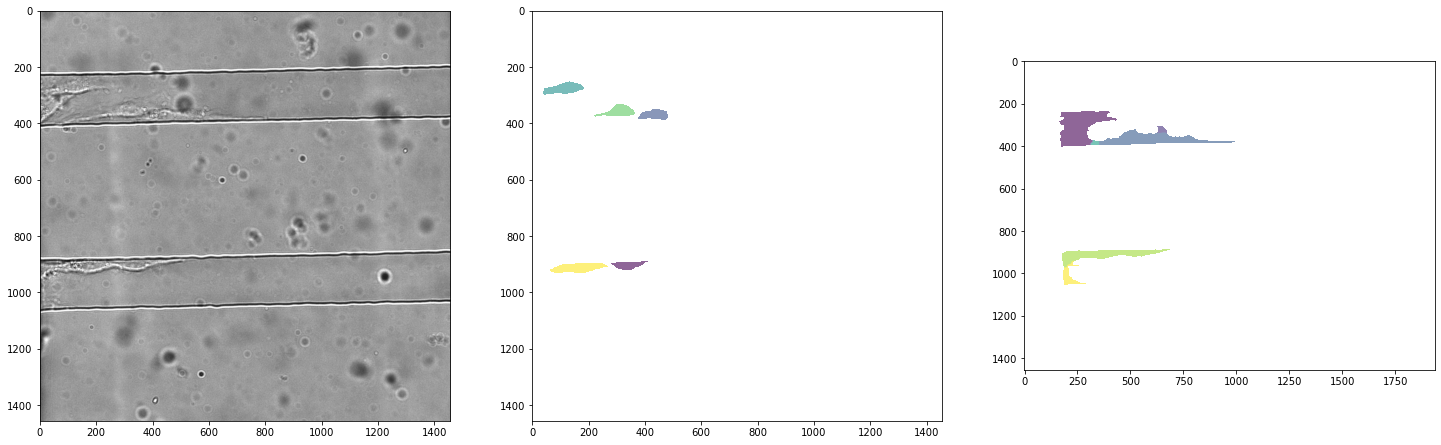

In [53]:
import tifffile as tiff
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Path to the raw image (like datasets/raw/Cell_Data/02/imagename.tif)
og_img = tiff.imread("/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/02/t025.tif")

# Path to the segmentation mask (like test_restuls/mask____.tif)
pred_mask=tiff.imread("/home/MinaHossain/DMNet_Rina/Cell-Data/02_RES-GT/mask025.tif")
pred_mask = np.ma.masked_where(pred_mask == 0, pred_mask)

# Path to the actual mask (like datasets/raw/Cell_Data/02_GT/SEG/imagename.tif)
gt_mask=tiff.imread("/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/02_GT/SEG/man_seg025.tif")
gt_mask = np.ma.masked_where(gt_mask == 0, gt_mask)
#gt_mask = np.ma.masked_where(gt_mask == 0, gt_mask)

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(25, 15)
ax[0].imshow(og_img, cmap='gray')

ax[1].imshow(gt_mask, alpha=0.6)
ax[2].imshow(pred_mask, alpha=0.6)

In [54]:

from PIL import Image
import numpy as np
import imageio

tmp_pred = imageio.volread('/home/MinaHossain/DMNet_Rina/Cell-Data/02_RES-GT/mask005.tif')
tmp_pred = np.array(tmp_pred, dtype=np.single)[None,:,:]
#tmp_pred.shape

tmp_og = imageio.volread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/02/t005.tif')
tmp_og = np.array(tmp_og, dtype=np.single)[None,:,:]
#tmp_og.shape


tmp_gt = imageio.volread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/02/t005.tif')
tmp_gt = np.array(tmp_gt, dtype=np.single)[None,:,:]
#tmp_gt.shape

print(tmp_pred.shape)
print(tmp_og.shape)
print(tmp_gt.shape)

(1, 1456, 1936)
(1, 1456, 1456)
(1, 1456, 1456)


In [55]:
# import matplotlib.pyplot as plt
# import numpy as np

# df = pd.read_csv('training_codes/Val_Loss')
# df.plot(x='Epoch', y='Val_Loss', kind='line')
# plt.title('Line plot of B vs A')
# plt.xlabel('A')
# plt.ylabel('B')
# plt.show()


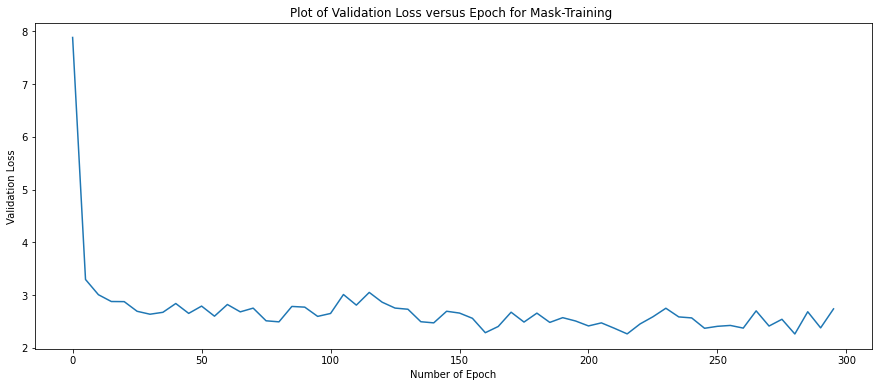

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/home/MinaHossain/DMNet_Rina/training_codes/Val_Loss')
#df.plot(x='Epoch', y='Val_Loss', kind='line')
plt.figure(figsize=(15, 6))
sns.lineplot(x='Epoch', y='Val_Loss', data=df)
plt.title('Plot of Validation Loss versus Epoch for Mask-Training ')
plt.xlabel('Number of Epoch')
plt.ylabel('Validation Loss')
plt.show()

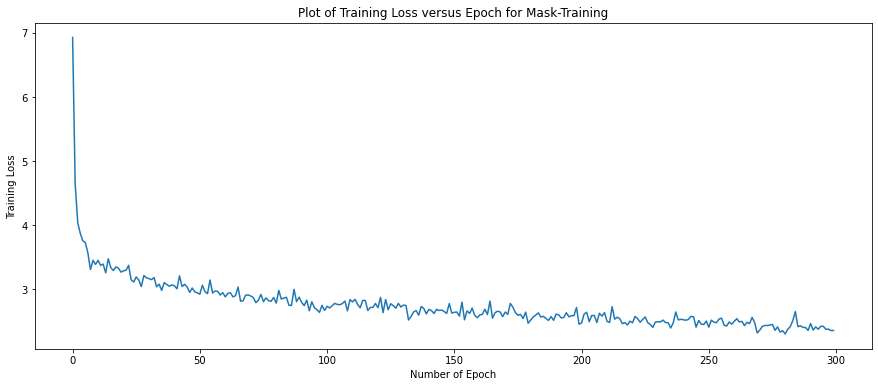

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/home/MinaHossain/DMNet_Rina/training_codes/Train_Loss')
#df.plot(x='Epoch', y='Val_Loss', kind='line')
plt.figure(figsize=(15, 6))
sns.lineplot(x='Epoch', y='Train_Loss', data=df)
plt.title('Plot of Training Loss versus Epoch for Mask-Training')
plt.xlabel('Number of Epoch')
plt.ylabel('Training Loss')
plt.show()

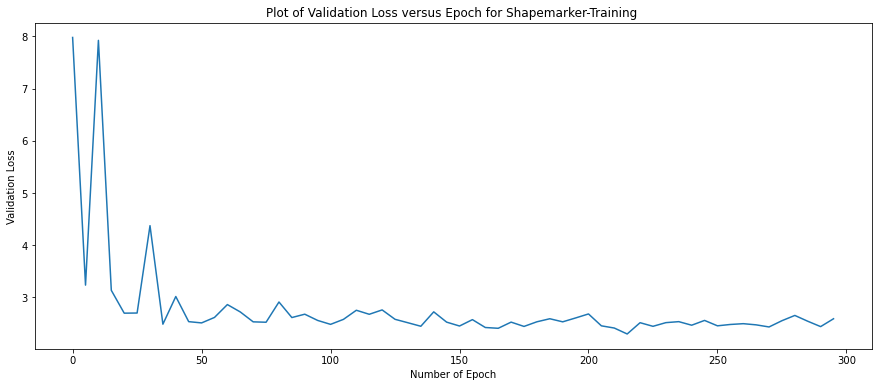

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/home/MinaHossain/DMNet_Rina/training_codes/Val_Loss_1')
#df.plot(x='Epoch', y='Val_Loss', kind='line')
plt.figure(figsize=(15, 6))
sns.lineplot(x='Epoch', y='Val_Loss', data=df)
plt.title('Plot of Validation Loss versus Epoch for Shapemarker-Training ')
plt.xlabel('Number of Epoch')
plt.ylabel('Validation Loss')
plt.show()

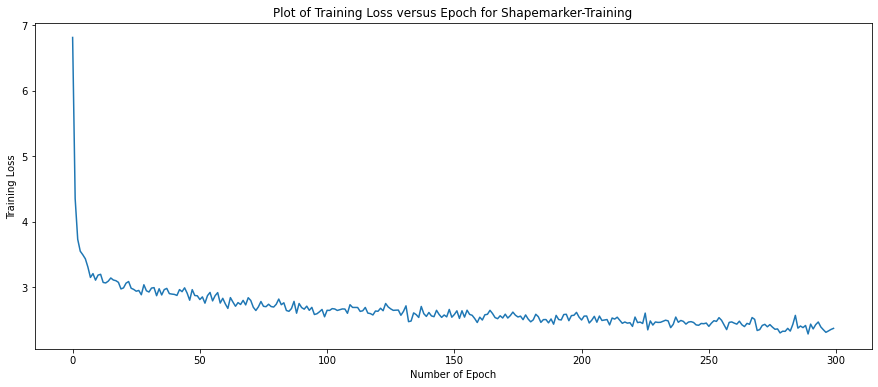

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/home/MinaHossain/DMNet_Rina/training_codes/Train_Loss_1')
#df.plot(x='Epoch', y='Val_Loss', kind='line')
plt.figure(figsize=(15, 6))
sns.lineplot(x='Epoch', y='Train_Loss', data=df)
plt.title('Plot of Training Loss versus Epoch for Shapemarker-Training')
plt.xlabel('Number of Epoch')
plt.ylabel('Training Loss')
plt.show()

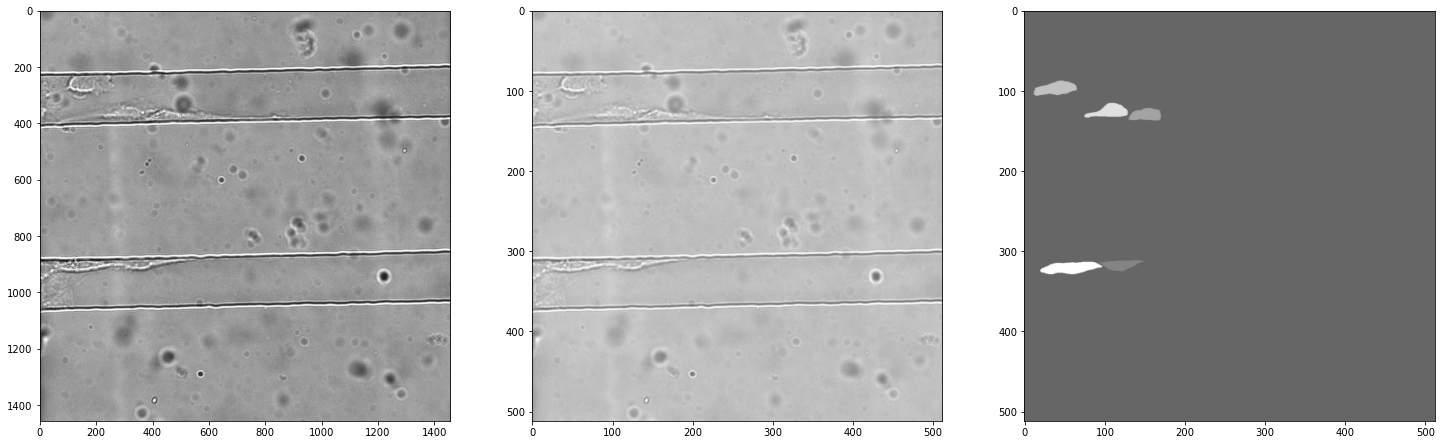

In [60]:
from PIL import Image
import numpy as np
import imageio
import matplotlib.pyplot as plt
from skimage.transform import resize




tmp_og = imageio.volread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/02/t005.tif')
#tmp_og = np.array(tmp_og, dtype=np.single)[None,:,:]
#tmp_og.shape
#img_og = resize(tmp_og, (512, 512))

tmp_re = imageio.volread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/02/t005.tif')
#tmp_re = np.array(tmp_re, dtype=np.single)[None,:,:]
#tmp_gt.shape
img_re = resize(tmp_re, (512, 512))


# print(tmp_og.shape)
# print(tmp_re.shape)
# gt_mask=tiff.imread("/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/02_GT/SEG/man_seg025.tif")
gt_mask=imageio.imread("/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/02_GT/SEG/man_seg025.tif")
#gt_mask = np.ma.masked_where(gt_mask == 0, gt_mask)
img_msk = resize(gt_mask, (512, 512))



fig, ax = plt.subplots(1, 3)
fig.set_size_inches(25, 15)
ax[0].imshow(tmp_og, cmap='gray')
ax[1].imshow(img_re,cmap='gray', alpha=0.6)
ax[2].imshow(img_msk,cmap='gray', alpha=0.6)


(1456, 1262)


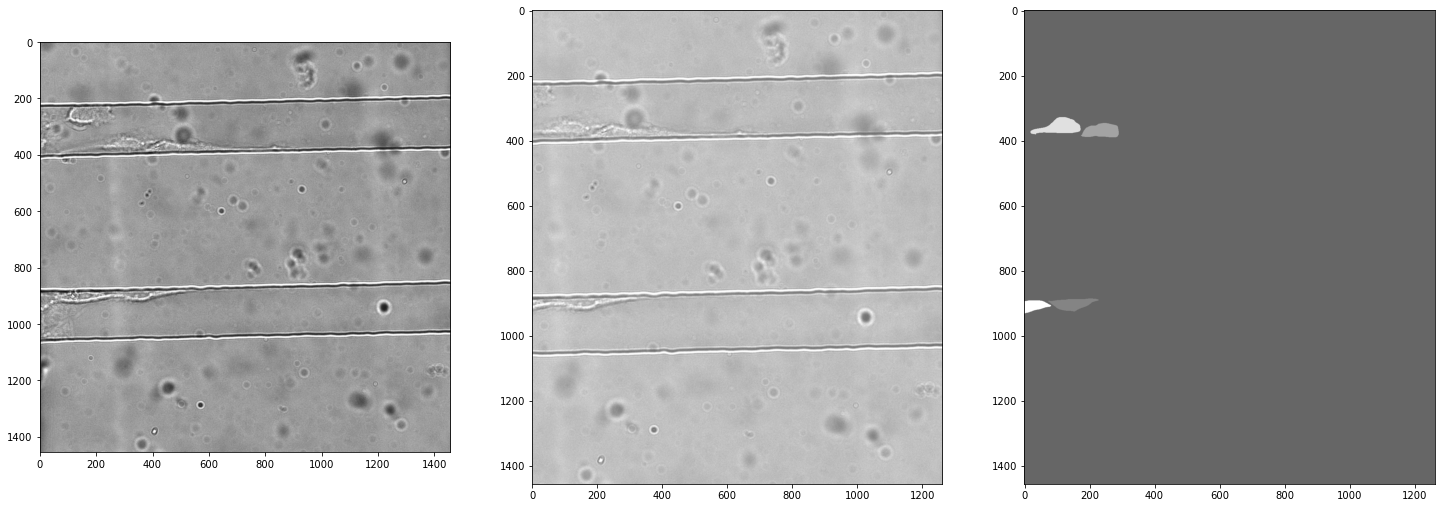

In [61]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

tmp_og = imageio.volread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/02/t005.tif')
tmp_og = np.array(tmp_og, dtype=np.single)
tmp_new=tmp_og[ :, 194:1650]
print(tmp_new.shape)

tmp_mask=imageio.imread("/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/02_GT/SEG/man_seg025.tif")
#tmp_mask = np.ma.masked_where(gt_mask == 0, gt_mask)
tmp_mask = np.array(tmp_mask, dtype=np.single)
tmp_mask=tmp_mask[ :, 194:1650]

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(25, 15)
ax[0].imshow(tmp_og, cmap='gray')
ax[1].imshow(tmp_new,cmap='gray', alpha=0.6)
ax[2].imshow(tmp_mask,cmap='gray', alpha=0.6)



In [62]:
tmp = imageio.volread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/01/t1377.tif')
tmp = np.array(tmp, dtype=np.single)[None,:,:]
tmp.shape 

(1, 1456, 1456)